In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def crosshair(img, point, size, color):
    """ Desenha um crosshair centrado no point.
        point deve ser uma tupla (x,y)
        color é uma tupla R,G,B uint8
    """
    x,y = point
    cv2.line(img,(x - size,y),(x + size,y),color,3)
    cv2.line(img,(x,y - size),(x, y + size),color,3)

# Exemplo de regressão linear em Python

## Geração dos dados

In [2]:
background = np.zeros((400, 550, 3), dtype=np.uint8)

In [3]:
y = np.array([ 80., 110., 140., 170., 200., 230., 260., 290., 320., 350., 380.,
       410., 440., 470., 500.,50.])

In [4]:
x = np.array([ 85.24603233,  59.52537694, 107.62039995,  95.39742991,
       132.8058387 , 199.00438625, 164.55620588, 146.17661588,
       166.31341531, 235.31630925, 194.29305358, 253.19297823,
       275.80559933, 260.10415532, 313.52093501, 400.])

In [5]:
def plot_points(x,y, img, color=(0,255,0)): 
    for i in range(x.shape[0]):
        crosshair(img, (int(x[i]),int(y[i])), size=5, color=color)
    plt.imshow(img)

In [6]:
plot_points(x,y,background)

## Regressão linear com Scikit-Learn

A regressão linear clássica tem a seguinte suposição:

$y = \beta_0 + \beta_1 x + \epsilon$, em que $\epsilon \sim N(0, \sigma)$ 

Ou seja: os valores de $y$ dependem linearmente de $x$ com um pequeno erro $\epsilon$

Mas como vamos classificar linhas quase *verticais* não podemos usar a regressão convencional. É mais produtivo escrever **x** em função de **y**

$x = \beta_0 + \beta_1 y + \epsilon$, em que $\epsilon \sim N(0, \sigma)$ 


In [7]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

yr = y.reshape(-1,1) # Entradas do modelo
xr = x.reshape(-1,) # saídas do modelo

reg.fit(yr,xr)

LinearRegression()

In [8]:
coef_angular, coef_linear = reg.coef_, reg.intercept_

Função encontrada

In [9]:
def f(y):
    x = coef_angular*y + coef_linear
    return x

Encontrando os pontos da reta para plot

In [10]:
def plot_regression_xfy(y, img, m, h, color=(255,0,0)):
    """Recebe m, h e dados y que geraram a função
        x = f(y)
        e uma imagem para plot
    """
    x = m*y + h
    y_min = int(min(y)) # precisa ser int para plotar na imagem
    y_max = int(max(y)) 

    x_min = int(f(y_min))
    x_max = int(f(y_max))    
    cv2.line(img, (x_min, y_min), (x_max, y_max), color, thickness=3);    
    plt.imshow(img)    
    

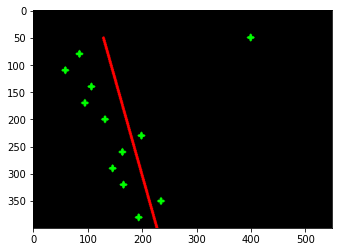

In [11]:
plot_regression_xfy(y, background, coef_angular, coef_linear)

### Removendo outliers

In [12]:
ransac = linear_model.RANSACRegressor(reg)

In [13]:
ransac.fit(yr, xr)
reg = ransac.estimator_

In [14]:
coef_angular, coef_linear = reg.coef_, reg.intercept_

In [15]:
background[:] = 0

In [16]:
plot_points(x,y, background)
plot_regression_xfy(y, background, coef_angular, coef_linear, color=(0,0,255))

# Prática


**Exercício 1**: Agora vamos executar o que aprendemos até o momento em uma aplicação envolvendo o robô móvel. Um dos problemas mais comuns em robótica móvel é o problema de seguir uma linha, mas para seguir, você deve primeiro ver a linha . Então, vamos resolver o problema de encontrar a linha na imagem utilizando filtragem de imagens e regressão linear.

O objetivo deste exercício é descobrir a inclinação da linha que o robô está seguindo. Uma linha vertical significa que o robô deve seguir em frente. Uma linha inclinada para a direita significa que o robô deve virar para a direita. Uma linha inclinada para a esquerda significa que o robô deve virar para a esquerda.

Para esse exercício, vamos trabalhar no arquivo [atividade5.py](atividade5.py). Você pode testar o seu código em uma das três imagens de teste. Para isso, basta descomentar a linha correspondente a imagem que você deseja testar. Por exemplo, para testar a imagem `frame1.jpg`, você deve descomentar a linha `img = cv2.imread('frame1.jpg')`.

No final, você deve executar o seu script no vídeo `pista_simulado.mp4` disponível para download no link abaixo. Ao rodar o vídeo você poderá ver seu código em ação. Para isso, baixe o vídeo no link e salve o arquivo dentro da pasta `img`, e então, comente a linha `rodar_frame()` e descomente a linha `rodar_video()`. Em alguns momentos do vídeo a linha está ausente, o que pode levar a erros na hora de encontrar o contorno, seu código deve ser robusto a esses tipos de cenários.

[Link para download do vídeo](https://insper-my.sharepoint.com/:v:/g/personal/diegops_insper_edu_br/EZXOZ69TxYpHgomDkhTLN8IBMqjulatHbVyCRtt9vKvQKw?nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJTdHJlYW1XZWJBcHAiLCJyZWZlcnJhbFZpZXciOiJTaGFyZURpYWxvZyIsInJlZmVycmFsQXBwUGxhdGZvcm0iOiJXZWIiLCJyZWZlcnJhbE1vZGUiOiJ2aWV3In19&e=LW0B1V)


**O seu código deve:**

1 - Segmentar as linhas amarelas da imagem;

2 - Encontrar os contornos dos segmentos de linha e desenhar os contornos na imagem;

3 - Encontrar o centróide de cada contorno. Desenhar um "crosshair" no centróide de cada contorno;

4 - Encontrar a linha que melhor se ajusta aos centróides dos contornos. Desenhar a linha na imagem - remova os pontos que estiverem muito distantes da linha (outliers);

5 - Calcular a inclinação da linha encontrada. Escrever a inclinação na imagem, em graus.

6 - Se seu código estiver funcionando corretamente para os três frames de teste, você pode testar seu código no vídeo - seu código deve ser robusto a cenários em que a linha não está presente.